<a href="https://colab.research.google.com/github/Giovannacm/nature-inspired-computing/blob/main/ProblemaDeBusca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy import random, linspace, sin, pi, exp, inf
from matplotlib.pyplot import plot, grid, subplots, title, legend

# Problema de Busca


Dado um espaço de busca S, junto com sua parte factível F, F ⊆ S, encontre x' ∈ F tal que eval(x') ≤ eval(x), ∀x ∈ F.

Em  um problema de **minimização**: a solução x para a qual a função de avaliação retorna o menor valor é considerada a melhor. Já no de **maximização**, pode ser utilizada uma função em que soluções que retornarem valores maiores são melhores (o mesmo que minimizar o negativo de f(x)).

> max(f(x)) = min(-f(x))

Entre os algoritmos para esse problema, temos: **Subida da Colina** (*Hill Climbing*) e **Recozimento Simulado** (*Simulated Annealing*). O primeiro explora a melhor solução disponível, mas não explora todo o espaço de busca. Já o segundo, combina exploração (explora o espaço todo em busca de soluções) e explotação (explora as melhores soluções encontradas até o momento).

Um ótimo local é o menor ponto dentro de uma vizinhança *N*, em outras palavras:

> x ∈ F é ótimo local se eval(x) ≤ eval(y), ∀y ∈ N(x), onde, N(x) = {y ∈ F: dist(x, y) ≤ ε}

onde dist(x, y) é uma função que determina a distância entre x e y, e ε é uma constante positiva.


Em um Problema de Busca, a função de avaliação define uma superfície de resposta, o chamado cenário de aptidão (parecida com a topografia de montanhas e vales). Dessa forma, o problema de encontrar a melhor solução consiste em buscar um pico (no caso de maximização) ou vale (minimização) no cenário de aptidão.

## Subida da Colina

Método de busca **local** que usa um *aperfeiçoamento iterativo*. Aplica a um único ponto no espaço de busca. A cada iteração um novo ponto x' é selecionado, realizando-se uma pequena perturbação no ponto atual x. O novo ponto é selecionado na vizinhança de x.

> **x' ∈ N(x)**

> **x' = x + Δx**

Se o novo ponto obtiver um valor melhor na função de avaliação, então ele passará a ser o ponto atual. Caso contrário, ele será descartado.

Os critérios de parada podem ser:
- Nenhuma melhoria pode ser obtida;
- Um número fixo de iterações foi realizado;
- Um ponto alvo foi atingido.

Algoritomo: seja x o ponto atual, g o valor alvo para a função de avalização (assumindo que é conhecido) e max_it o número máximo de iterações permitidas.


In [ ]:
def inicializar():
  x0 = random.random()
  return x0

def perturbar(x, sigma = 0.01, lin_inf = 0, lin_sup = 1): #0.1, 0.01, 0.05
  x_novo = x + random.normal(0, sigma)

  while x_novo <= lin_inf or x_novo >= lin_sup:
    x_novo = x + random.normal(0, sigma)

  return x_novo

### Simples

In [ ]:
def hill_climbing(f, max_it, x0=None): #determinístico
  if x0 is None:
    x0 = inicializar()

  x = x0
  av_x = f(x)
  t = 0

  while t < max_it: #and av_x != g
    x_novo = perturbar(x)
    av_x_novo = f(x_novo)

    if av_x_novo > av_x:
      x = x_novo
      av_x = av_x_novo

    t = t + 1

  return x

O algoritmo acima possui algumas limitações: 
- Normalmente termina em soluções ótimas locais;
- Não há informação sobre a distância da solução encontrada para a ótima global;
- O ótimo encontrado depende da configuração inicial;
- Não é possível calcular um limite para o tempo computacional do algoritmo.

Como só fornece soluções ótimas locais, é razoável iniciá-lo de uma grande variedade de pontos, na esperança de que pelo menos um deles leve ao ótimo global.

Os pontos iniciais podem ser escolhidos: aleatóriamente, usando uma grade ou padrão regular ou outros tipos de informação.

Nesse caso, o algoritmo tradicional será inicializado múltiplas vezes e teremos uma "memória da melhor solução".

> Primeira variação: **Subida da Colina Iterativo** (*Iterated Hill Climbing*).

### Iterativo

In [ ]:
def hill_climbing_iterativo(f, n_x0, max_it): # n_x0 é a quantidade de pontos iniciais que sera utilizada
  av_x_melhor = -inf
  t1 = 0

  while t1 < n_x0:
    x0 = inicializar()

    x = hill_climbing(f, max_it, x0)
    av_x = f(x)

    if av_x > av_x_melhor:
      x_melhor = x
      av_x_melhor = av_x
      x0_melhor = x0

    t1 = t1 + 1

  return x_melhor, x0_melhor

Um critério de parada alternativo pode ser: se a melhor solução não mudar signifcativamente após um certo núvemo de iterações, pode-se dizer que o algoritmo convergiu para um ótimo local e o processo pode ser parado.

Na prática, o número de soluções ótimas locais pode ser bastante alto. Assim, estratégia de tentativa e erro não é plausível. 

Uma boa estratégia é combinar a boa capacidade de explotação do Subida da Colina com muitas outras técnicas que sejam capazes de executar uma melhor exploração do espaço de busca.

> Segunda variação: **Subida da Colina Probabilístico** (*Stochastic Hill Climbing*).

Nele, a probabilidade de que x' seja selecionado depende da diferença entre os valores retornados pela função de avaliação x e x'.

No algoritmo, T é um parâmetro de controle do decaimento da função exponencial. Quanto maior seu valor, menor a importência da diferença da avaliação de x e x. Com um alto valor em T, a busca fica similar a uma busca aleatória.

### Probabilístico

In [ ]:
def hill_climbing_probabilistico(f, max_it, T, x0=None): #não determinístico
  if x0 is None:
    x0 = inicializar()

  x = x0
  av_x = f(x)
  t = 0

  while t < max_it: #and av_x != g
    x_novo = perturbar(x)
    av_x_novo = f(x_novo)

    if random.random() < (1/(1 + exp((av_x - av_x_novo) / T))):
      x = x_novo
      av_x = av_x_novo

    t = t + 1

  return x

## Recozimento Simulado

Inspirado no processo de recozimento de sistemas físicos, ou seja, no processo de sujeitar um material a um processo de aquecimento e resfriamento lento para torná-lo mais forte e reduzir sua fragilidade.

Nesse processo a temperatura do material é elevada para que derreta e seus átomos possam se mover livremente. Em seguida, a temperatura do sistema derretido é lentamente diminuída para que a cada nova temperatura os átomos possam se movimentar o suficiente para adotar uma orientação mais estável. Assim, se a temperatura for diminuída suficientemente devagar, os átomos irão repousar na orientação mais estável, produzindo um cristal.

Nesse sentido, comparando com um Problema de Busca:
- Estado do sistema físico equivale a uma possível solução do problema;
- A energia do sistema é medida pela função de avaliação;
- O estado de equilíbrio equivale a um ótimo local;
- O estado de mínima energia é o ótimo global;
- Temperatura é um parâmetro de controle;
- Recozimento é a busca reduzindo T.

Algoritmo: seja x a atual configuração do sistema, x' a configuração de x após um pequeno deslocamento aleatório e T a temperatura do sistema. A função g(T, t) é responsável por reduzir o valor da temperatura. Geralmente utiliza-se um decrement geométrico: T = β.T, onde β < 1.

In [ ]:
def recozimento_simulado(f, b, max_it, x0=None, T=None, T_limit=0.01):
  if T is None:
    T = inicializar()

  if x0 is None:
    x0 = inicializar()

  x = x0
  av_x = f(x)
  t = 0

  while t < max_it:
    x_novo = perturbar(x)
    av_x_novo = f(x_novo)

    if av_x_novo > av_x:
      x = x_novo
      av_x = av_x_novo
    elif random.random() < (exp((av_x_novo - av_x) / T)):
      x = x_novo
      av_x = av_x_novo

    T = T*b
    if T < T_limit:
      T = T_limit

    t = t + 1

  return x

# Exercícios

Encontre o valor máximo da função. Para isso:
- Utilize o valor real da variável x para representar as soluções candidatas x ∈ [0,1];
- Para perturbar o ponto atual, utilize o ruído Gaussiano de média zero e pequena variância G(0, σ)
 - x' = x + G(0, σ), onde σ é uma constante positiva pequena;
 - Também pode ser utilizada uma distribuição uniforme em vez de Gaussiana;
- Serão descartados resultados fora do intervalo [0, 1];
- Assumir que o máximo global é desconhecido.



In [ ]:
x = linspace(0, 1, 100)
f = lambda x: 2**(-2*(((x-0.1)/0.9)**2))*(sin(5*pi*x))**6

## Item 1

Implemente os vários tipos de algoritmos de Subida da Colina e Recozimento Simulado para resolver o problema proposto no Exemplo de Aplicação. Use um esquema de representação para as soluções candidatas (variável x). Compare o desempenho dos algoritmos e tire suas conclusões.

In [ ]:
def executa_todos(x, f, max_it, n_x0, T_hcp, b, T_rs, x0=None):
  if x0 is None:
    x0 = inicializar()

  fig, axs = subplots(2, 2, figsize=(10,10))

  x_hc = hill_climbing(f, max_it, x0)
  axs[0, 0].plot(x, f(x))
  axs[0, 0].plot(x_hc, f(x_hc), 'bo', label='resultado x\'= ' + str(round(x_hc, 6)))
  axs[0, 0].plot(x0, f(x0), 'mo', label='chute inicial x0=' + str(round(x0, 6)))
  axs[0, 0].set_title('Hill climbing')
  axs[0, 0].legend()

  x_hci, x0_hci = hill_climbing_iterativo(f, n_x0, max_it)
  axs[0, 1].plot(x, f(x))
  axs[0, 1].plot(x_hci, f(x_hci), 'bo', label='resultado x\'= ' + str(round(x_hci, 6)))
  axs[0, 1].plot(x0_hci, f(x0_hci), 'mo', label='chute inicial x0=' + str(round(x0_hci, 6)))
  axs[0, 1].set_title('Hill climbing iterativo')
  axs[0, 1].legend()

  x_hcp = hill_climbing_probabilistico(f, max_it, T_hcp, x0)
  axs[1, 0].plot(x, f(x))
  axs[1, 0].plot(x_hcp, f(x_hcp), 'bo', label='resultado x\'= ' + str(round(x_hcp, 6)))
  axs[1, 0].plot(x0, f(x0), 'mo', label='chute inicial x0=' + str(round(x0, 6)))
  axs[1, 0].set_title('Hill climbing probabilistico')
  axs[1, 0].legend()

  x_rs = recozimento_simulado(f, b, max_it, x0, T_rs)
  axs[1, 1].plot(x, f(x))
  axs[1, 1].plot(x_rs, f(x_rs), 'bo', label='resultado x\'= ' + str(round(x_rs, 6)))
  axs[1, 1].plot(x0, f(x0), 'mo', label='chute inicial x0=' + str(round(x0, 6)))
  axs[1, 1].set_title('Recozimento simulado')
  axs[1, 1].legend()

  for ax in axs.flat:
      ax.label_outer()

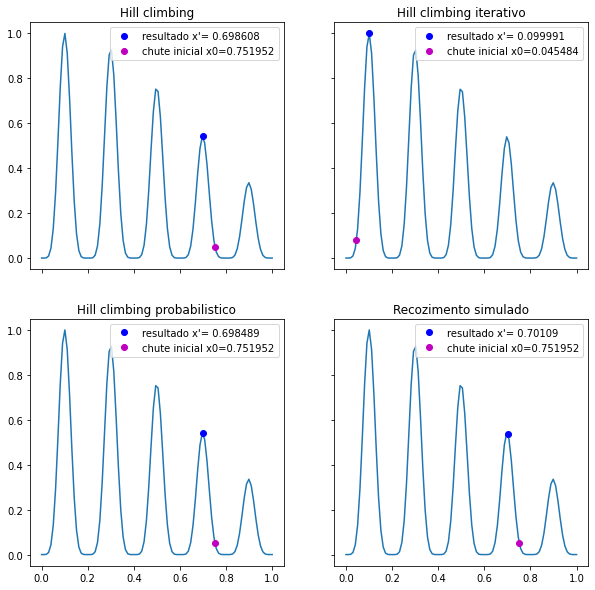

In [ ]:
executa_todos(x, f, max_it=500, n_x0=10, T_hcp=0.01, b=0.01, T_rs=10)

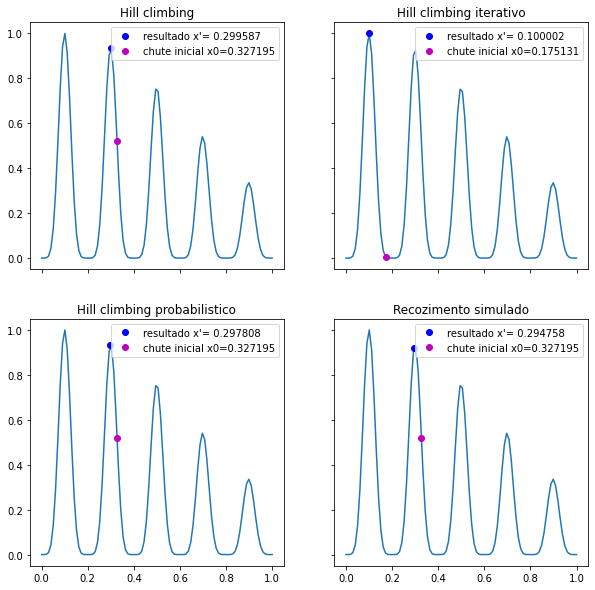

In [ ]:
executa_todos(x, f, max_it=1000, n_x0=10, T_hcp=0.01, b=0.01, T_rs=10)

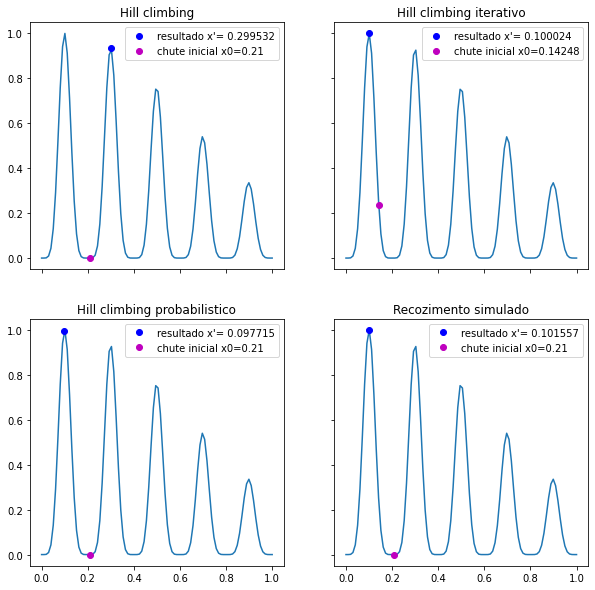

In [ ]:
executa_todos(x, f, max_it=1000, n_x0=10, T_hcp=0.01, b=0.01, T_rs=10, x0=0.21)

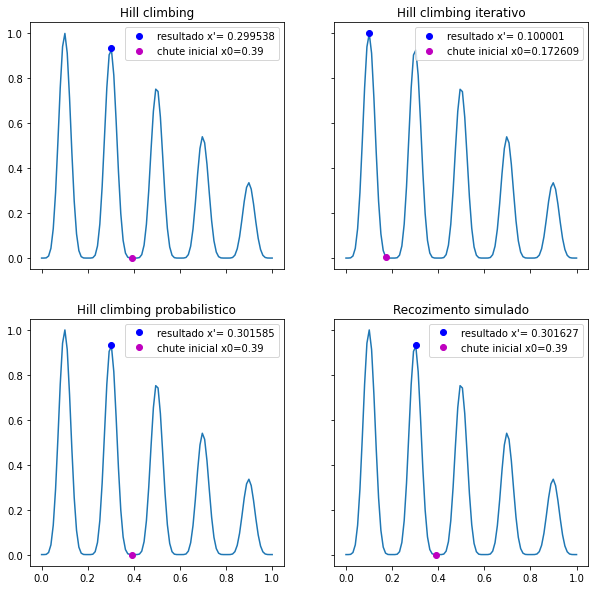

In [ ]:
executa_todos(x, f, max_it=1000, n_x0=10, T_hcp=0.01, b=0.01, T_rs=10, x0=0.39)

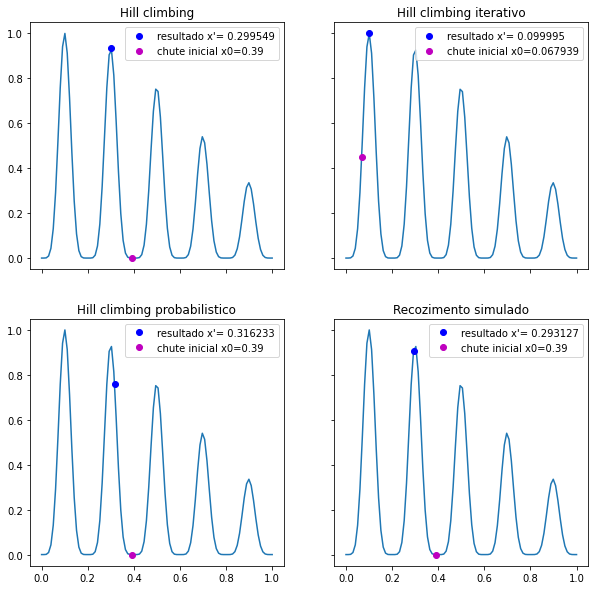

In [ ]:
executa_todos(x, f, max_it=1000, n_x0=10, T_hcp=0.1, b=0.01, T_rs=1, x0=0.39)

No hill climbing normal, a solução encontrada depende da configuração inicial e sempre é limitada à um ótimo local. Já no iterativo, como outras n soluções iniciais são testadas, observa-se que um dos chutes levou próximo ao ótimo global.

O probabilístico é não-determinístico. Sua vantagem é que existe uma chance dele não ficar preso num ótimo local e buscar um ótimo global. Já o iterativo faz isso de outra maneira, ele busca um chute inicial que esteja mais próximo do global. Nos testes acima, entretanto, não foi possível observar uma configuração que o probabilístico levou a um ótimo global.

Um ponto a ser destacado é a respeito do método de perturbação. Se diminui o desvio padrão é mais provável que o método fique preso no topo mais próximo. Quanto menor o sigma (desvio padrão da perturbação), menor o passo.

## Item 2

Para o Subida da Colina simples, utilize diferentes configurações iniciais como tentativas de encontrar o ótimo global. O algoritmo teve sucesso?

In [ ]:
def executa_hill_climbing(x, f, max_it, x0=None):
  if x0 is None:
    x0 = inicializar()

  x_hc = hill_climbing(f, max_it, x0)
  plot(x, f(x))
  plot(x_hc, f(x_hc), 'bo', label='resultado x\'= ' + str(round(x_hc, 6)))
  plot(x0, f(x0), 'mo', label='chute inicial x0=' + str(round(x0, 6)))
  title('Hill climbing')
  legend()

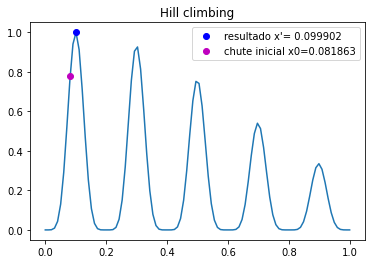

In [ ]:
executa_hill_climbing(x, f, max_it=500)

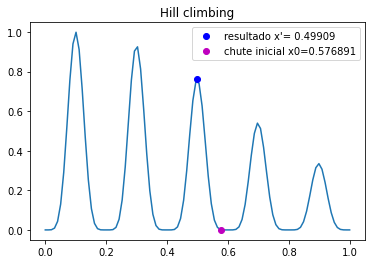

In [ ]:
executa_hill_climbing(x, f, max_it=1000)

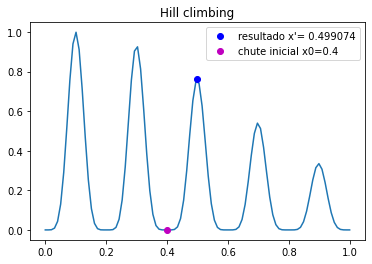

In [ ]:
executa_hill_climbing(x, f, max_it=500, x0=0.4)

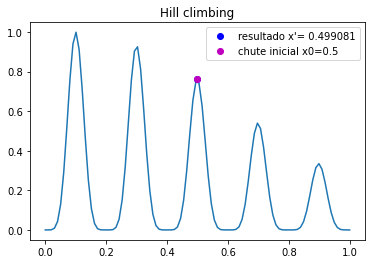

In [ ]:
executa_hill_climbing(x, f, max_it=500, x0=0.5)

Obsrva-se que, em todas as configurações testadas, o ótimo local foi encontrado de acordo com o chute inicial.

## Item 3

Discuta a sensibilidade de todos os algoritmos com relação aos seus parâmetros de entrada.

O hill climbing normal, é muito sensivel ao chute inicial, uma vez que o resultado final depende desse valor. O iterativo, depende da quantidade de chutes iniciais a serem restados. O probabilístico é sensivel ao valor de T, uma vez que um T maior implica num comportamento de busca aleatória. Já o recozimento simulado, além do T, depende do valor de beta (b). Como todos utilizam o método de inicialização, o valor de sigma (desvio padrão da perturbação) também se torna um fator relevante, pois quanto menor seu valor, menor o passo.

# Referências

Aula: Computação Evolutiva (Parte 1). Professor [Fabricio Breve](https://www.fabriciobreve.com/).